In [117]:

# PZ 4 classes and libs

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.svm import SVC
# import random
from sklearn.metrics import accuracy_score


def get_mutate_arrs(mutation_rate:float,etalon_event:list,num_mutations:int) -> list:
    """
    ### Процент мутации (10%)
    mutation_rate = 0.1

    ### Количество мутаций
    num_mutations

    ### эталон для дальнейшей мутации
    etalon_event
    """
    mutated_events = []
    for item in range(num_mutations):
        # Создание N мутаций единичного объекта 
        mutation = list(*np.random.choice([0, 1], size=(1, len(etalon_event)), p=[1 - mutation_rate, mutation_rate]))
        # Применение мутаций
        mutated_event = [x ^ y for x, y in zip(etalon_event, mutation)]
        mutated_events.append(mutated_event)
    ## Много экземпляров мутаций
    return mutated_events






class KNN_model():
    def __init__(self,etalon_events:list) -> None:
        # Получение мутаций для каждого эталона
        our_mutations = [get_mutate_arrs(0.1, etalon_event=etalon, num_mutations=10000) for etalon in etalon_events]
         # Подготовка данных
        X = []
        y = []
        # Создание обучающего набора и меток
        for i, etalon in enumerate(etalon_events):
            X += our_mutations[i]
            y += [i] * len(our_mutations[i])
         # Разделение данных на обучающий и тестовый наборы
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # # # # # Создание и обучение модели KNN (с учетом оптимального числа соседей p.s. проверил на опыте)
        self.knn_classifier = KNeighborsClassifier(n_neighbors=10)
        self.knn_classifier.fit(X_train, y_train)

    def predict_KNN(self,object:list) -> list:
        return self.knn_classifier.predict(object)

    def count_accuracy_KNN(self,  objects: list, labels: list) -> float:
        # вычисление точности предсказания для KNN
        if type(labels) != list:
            labels = [labels for _ in range(len(objects))]
        else:
            pass
            # if len(labels) != len()
        predicted_list = self.knn_classifier.predict(objects)
        accuracy = accuracy_score(labels, predicted_list)
        return accuracy

class TREE_model():
    def __init__(self,etalon_events:list) -> None:
        # Получение мутаций для каждого эталона
        our_mutations = [get_mutate_arrs(0.1, etalon_event=etalon, num_mutations=10000) for etalon in etalon_events]
         # Подготовка данных
        X = []
        y = []
        # Создание обучающего набора и меток
        for i, etalon in enumerate(etalon_events):
            X += our_mutations[i]
            y += [i] * len(our_mutations[i])
         # Разделение данных на обучающий и тестовый наборы
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # # # # # Создание и обучение модели TREE 
        self.tree_classifier = DecisionTreeClassifier()
        self.tree_classifier.fit(X_train, y_train)

    def predict_TREE(self,object:list) -> list:
        return self.tree_classifier.predict(object)
    def count_accuracy_TREE(self,  objects: list, labels: list) -> float:
        # вычисление точности предсказания для KNN
        if type(labels) != list:
            labels = [labels for _ in range(len(objects))]
        else:
            pass
            # if len(labels) != len()
        predicted_list = self.tree_classifier.predict(objects)
        accuracy = accuracy_score(labels, predicted_list)
        return accuracy


class SVM_model():
    def __init__(self, etalon_events: list) -> None:
        # Получение мутаций для каждого эталона
        our_mutations = [get_mutate_arrs(0.1, etalon_event=etalon, num_mutations=10000) for etalon in etalon_events]
        # Подготовка данных
        X = []
        y = []
        # Создание обучающего набора и меток
        for i, etalon in enumerate(etalon_events):
            X += our_mutations[i]
            y += [i] * len(our_mutations[i])
        # Разделение данных на обучающий и тестовый наборы
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Создание и обучение модели SVM
        self.svm_classifier = SVC()
        self.svm_classifier.fit(X_train, y_train)

    def predict_SVM(self, object: list) -> list:
        # Возвращение предсказанной метки(-ок)
        return self.svm_classifier.predict(object)
    def count_accuracy_SVM(self,  objects: list, labels: list) -> float:
        # вычисление точности предсказания для KNN
        if type(labels) != list:
            labels = [labels for _ in range(len(objects))]
        else:
            pass
            # if len(labels) != len(objects)
        predicted_list = self.svm_classifier.predict(objects)
        accuracy = accuracy_score(labels, predicted_list)
        return accuracy


class Superior_ML():
    def __init__(self,predicted_lists:list) -> None:
        self.new_list = [[] for _ in range(len(predicted_lists[0]))]
        for sublist in predicted_lists:
            for num,item in enumerate(sublist):
                self.new_list[num].append(item)

    def get_new_list(self) -> list:
        return self.new_list
    
    def count_accuracy_Superior_ML(self,label:int)-> float:
        list_for = self.new_list.copy()
        for num,item in enumerate(self.new_list):
            list_for[num] = self.majority_element(list_for[num])
        counter = 0
        for item in list_for:
            if item == label:
                counter +=1
        counter/= len(list_for)
        return counter

    def majority_element(self,lst:list) -> list:
        """
        Возвращает элемент, который встречается в списке чаще всего.
        В случае равного количества различных элементов возвращает первый.
        """
        # Используем встроенную функцию max с параметром key, чтобы получить элемент с наибольшим количеством вхождений
        return max(set(lst), key=lst.count)




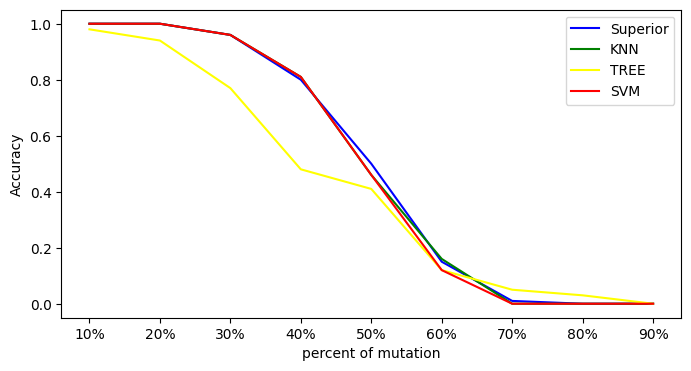

In [123]:
##### PZ 4

from matplotlib import pyplot as plt 

len_for_priznak = 25
etalon_events = [ 
    [1 for _ in range(8)] + [0 for _ in range(len_for_priznak-8)],
    [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-16)] + [0 for _ in range(8)],
    [0 for _ in range(8)] +[1 for _ in range(len_for_priznak-8)]]

# new_mutations = get_mutate_arrs(mutation_rate=0.6,etalon_event=etalon_events[0],num_mutations=100)


knn_classifier = KNN_model(etalon_events=etalon_events)
# print(knn_classifier.predict_KNN(   mutated_one    ))
# print(knn_classifier.count_accuracy_KNN(labels=0,objects=new_mutations))

tree_classifier = TREE_model(etalon_events=etalon_events)
# print(tree_classifier.predict_TREE(   mutated_one    ))
# print(tree_classifier.count_accuracy_TREE(labels=0,objects=new_mutations))

svm_classifier = SVM_model(etalon_events=etalon_events)
# print(svm_classifier.predict_SVM(   mutated_one    ))
# print(svm_classifier.count_accuracy_SVM(labels=0,objects=new_mutations))



percents_of_mutation = []
blue_values = []
green_values = []
red_values = []
yellow_values = []
for i in range(1,10):
    new_mutations = get_mutate_arrs(mutation_rate=i/10,etalon_event=etalon_events[0],num_mutations=100)
    percents_of_mutation.append(f'{i*10}%')
    
    labels_knn = knn_classifier.predict_KNN(new_mutations)
    labels_svm = svm_classifier.predict_SVM(new_mutations)
    labels_tree = tree_classifier.predict_TREE(new_mutations)
    sup_ml = Superior_ML([labels_knn,labels_svm,labels_tree])
    
    blue_values.append(sup_ml.count_accuracy_Superior_ML(label=0))
    green_values.append(knn_classifier.count_accuracy_KNN(labels=0,objects=new_mutations))
    yellow_values.append(tree_classifier.count_accuracy_TREE(labels=0,objects=new_mutations))
    red_values.append(svm_classifier.count_accuracy_SVM(labels=0,objects=new_mutations))


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(percents_of_mutation,blue_values,color='blue',label='Superior')    
ax.plot(percents_of_mutation,green_values,color='green',label='KNN')    
ax.plot(percents_of_mutation,yellow_values,color='yellow',label='TREE')    
ax.plot(percents_of_mutation,red_values,color='red',label='SVM')    

ax.set_xlabel('percent of mutation')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show() 